# 01 - Robot Steering and Throttle Calibration Tool
Author: George Gorospe, george.gorospe@nmaia.net (updated 2/21/2025)

## In this first notebook we'll find the parameters of our racer to calibrate our steering and throttle control.

## **** IMPORTANT ****
### Before running this notebook you MUST elevate your robot off the ground.
### Make sure that the robot's wheels are free to rotate and that the robot is on a stable suppot.
### This notebook will cause the robots wheels to turn very quickly.

### BE CAREFUL!

## ***** ROBOT SETUP ****
### Before running the cells of this notebook, ensure that the robot's propulsion system is on.
### On the Futaba controller, ensure that the control switch is set to computer control mode.

In [ ]:
# Importing required Libaries
import cv2, glob
import ipywidgets
import ipywidgets.widgets as widgets
from ipywidgets import Layout

import traitlets
from IPython.display import display

# Style and Layout
Style = {'description_width': 'initial'}

# Setup of NvidiaRacecar Object: Used to contro the steering and throttle of our AI racer.
from jetracer.nvidia_racecar import NvidiaRacecar
car = NvidiaRacecar()

## MECHATRONICS: Controlling the Racer with the Computer
The computer can produce commands to control the motion of the racer's motors. With the computer, we can change the steering angle and control the car's throttle.

Here, we're going to explore which commands are used for turning Left/Right and which commands are used for forwards/backwards.

To aid us in the process we'll use graphical controls within this notebook.

The following cell, sets up the graphical controls and connects those controls with callback functions, which execute when there is a change to the graphical control. 
Finally, those callback functions use the NvidiaRaceCar object we created earlier, "car" to send commands to the racer.

In [ ]:
# Setup of Steering/Throttle graphic user interface (GUI)
# 1. Create the graphic controls
# 2. Connect callback functions and connect them to the controls so they activate when the controls are used
# 3. Create a display for the controls with instructions

###### 1. Creating graphic controls

# Steering Control textbox
# We want to explore the full range of the servo by issuing commands.
steering_control = widgets.FloatText(value=.2, description='car.steering =', step = 0.01, style =  Style,layout=Layout(width='150px', height='30px'))
throttle_control = widgets.FloatText(value=.26, description='car.throttle =', step = 0.01, style =  Style,layout=Layout(width='150px', height='30px'))


###### 2. Connecting callback functions and connecting them to the controls

# This fuction executes when the steering value is changed
def steering_callback(change):
    car.steering = steering_control.value # Issue servo steering command by the computer to the vehicle's steering servo

def throttle_callback(change):
    car.throttle = throttle_control.value # Issue throttle command by the computer to the vehicle's speed controller

# Callback connections (Observers)
steering_control.observe(steering_callback, names='value') # Observes the steering_control widget
throttle_control.observe(throttle_callback, names='value') # Observes the throttle_control widget

###### 3. Display the controls with instructions
instructions_01 = widgets.Label(value=str("INSTRUCTIONS: Use the following controls to explore your car's control parameters, then write the parameters in the cell below:"))
instructions_02 = widgets.Label(value=str("car.steering box: slowly increase/decrease to find the limits of the steering to the left/right."))
instructions_03 = widgets.Label(value=str("The car.throttle calibration process:"))
instructions_03a = widgets.Label(value=str("1. Slowly increase the throttle first to find the point when the wheels start moving backwards. Find the point before wheel motion where you can hear noise from the motor."))
instructions_03b = widgets.Label(value=str("2. Slowly decrease the car.throttle value to find a value where the wheels do not move and there is no motion. This is the dead_throttle point."))
instructions_03c = widgets.Label(value=str("3. Reduce the value by 1.0 from the dead_throttle to prime the propulsion system, the return to dead_throtle."))
instructions_03d = widgets.Label(value=str("4. From the dead_throttle position, slowly decrease the throttle until the wheels start moving fowards. Find the point before wheel motion where you can hear noise from the motor.")) 
instruction_set_01 = widgets.VBox([instructions_01, instructions_02])
instruction_set_02 = widgets.VBox([instructions_03, instructions_03a, instructions_03b,instructions_03c,instructions_03d])
control_UI = widgets.VBox([instruction_set_01, steering_control, instruction_set_02, throttle_control])

display(control_UI)

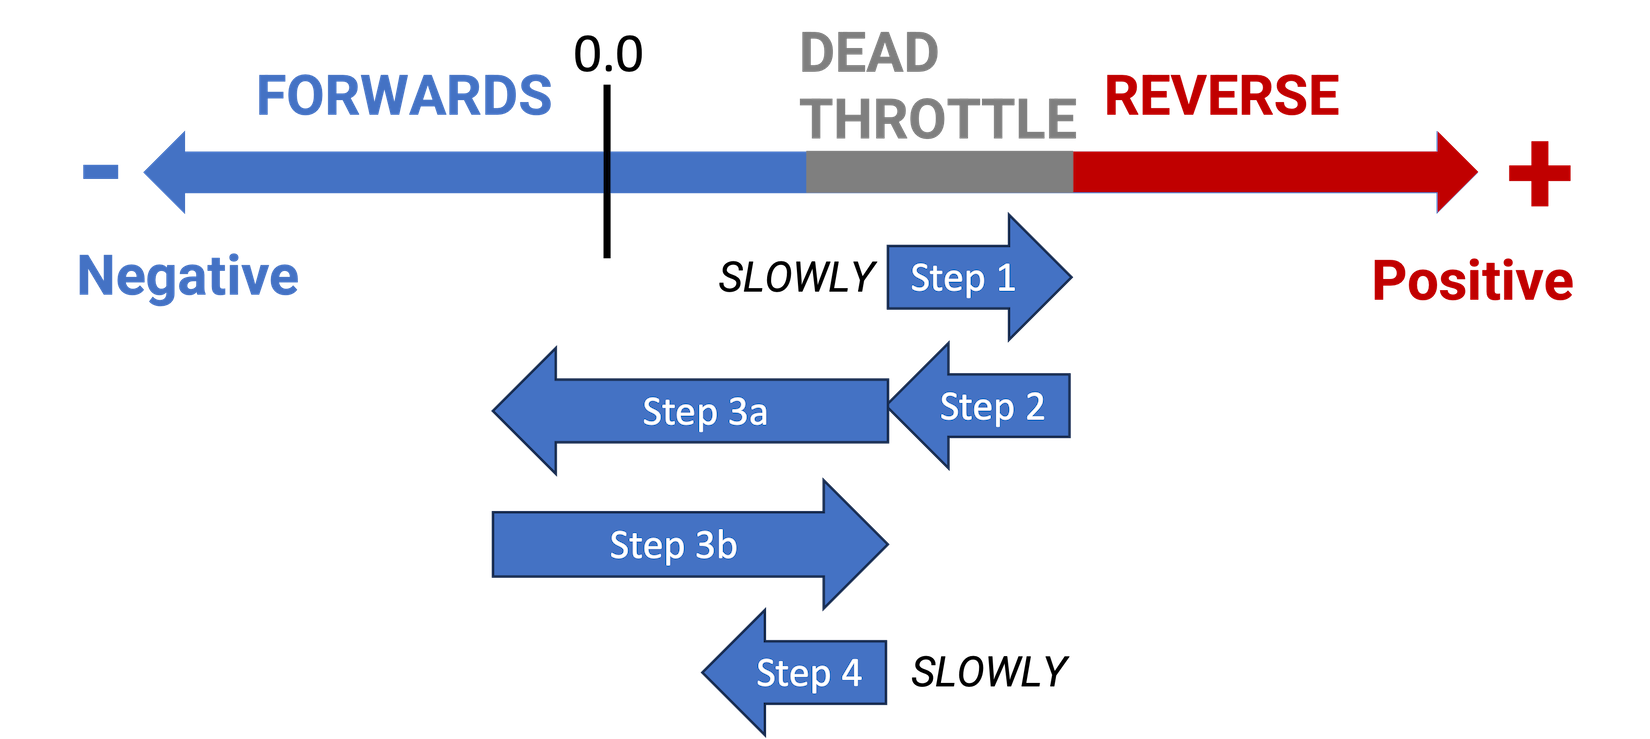

In [ ]:
# Fill in these values after working with the graphical interface above
# Important info to copy to other notebooks later

#### CAR STEERING PARAMETERS
steering_center = 0.29              #### FIND THE VALUE FOR CENTER AND ENTER HERE
steering_left_max = 0.8             #### FIND THE VALUE FOR MAXIMUM LEFT AND ENTER HERE
steering_right_max = -0.08            #### FIND THE VALUE FOR MAXIMUM RIGHT AND ENTER HERE

#### CAR THROTTLE PARAMETERS
throttle_forward_start_noise_no_motion = -0.06        #### FIND VALUE THAT CAUSES FORWARD MOTION, ENTER VALUE BEFORE MOTION STARTS
throttle_reverse_start_noise_no_motion = 0.12        #### FIND THE VALUE THAT CAUSES REVERSE MOTION, ENTER VALUE BEFORE MOTION STARTS
dead_throttle = 0.03    # Halfway between                    #### DEAD THROTTLE IS BETWEEN OTHER TWO VALUES, NO MOTION SHOULD OCCUR DURING DEAD THROTTLE

In [ ]:
# Writing calibration information to robot configruation file

# Using the JSON library to store the data
import json # JSON stands for Javascript Object Notation, its a very common format for structuring data

racer_parameters = {
    "name":"AI Racer",
    "steering_center": steering_center,
    "steering_left_max": steering_left_max,
    "steering_right_max": steering_right_max,
    "throttle_forward_start": throttle_forward_start_noise_no_motion,
    "throttle_reverse_start": throttle_reverse_start_noise_no_motion,
    "dead_throttle": dead_throttle,
}

######### Write JSON to file on the harddrive #########
# This command is used with in the open() as a file: structure seen below:
with open('/home/racer_core/racer_parameters.json', 'w') as file_name: 
  json.dump(racer_parameters, file_name, indent=4, separators=(',', ': '))
